# Testing `lifelines` package

## Installation

In [ ]:
# pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 KB 9.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 KB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 KB 14.0 MB/s eta 0:00:00
Using legacy 'setup.py install' for autograd-gamma, since package 'wheel' is not installed.
  Running setup.py install for autograd-gamma ... done
Note: you may need to restart the kernel to use updated packages.


## Load test data
Let’s start by importing some data. We need the durations that individuals are observed for, and whether they “died” or not.

In [1]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

In [3]:
df

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137
...,...,...,...
158,60.0,1,control
159,60.0,1,control
160,60.0,1,control
161,60.0,1,control


## Explore test data

In [4]:
df.group.value_counts()

group
control    129
miR-137     34
Name: count, dtype: int64

<Axes: xlabel='T', ylabel='E'>

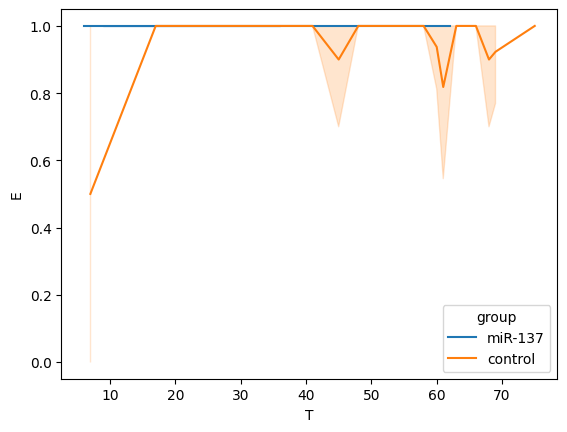

In [9]:
import seaborn as sns

sns.lineplot(data=df, x="T", y="E", hue="group")

<Axes: xlabel='T', ylabel='E'>

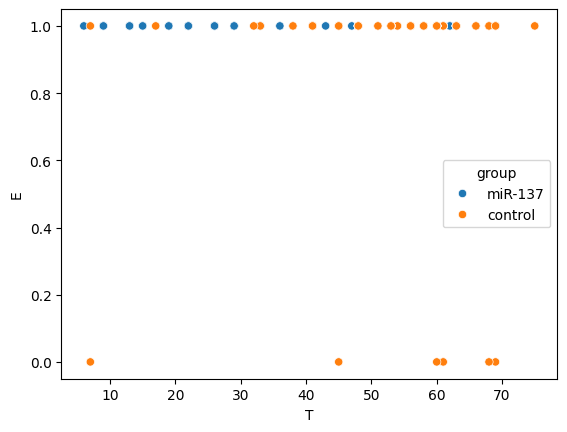

In [12]:
import seaborn as sns

sns.scatterplot(data=df, x="T", y="E", hue="group")

## Kaplan-Meier

In [13]:
T = df['T']
E = df['E']

In [14]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 163 total observations, 7 right-censored observations>

<Axes: xlabel='timeline'>

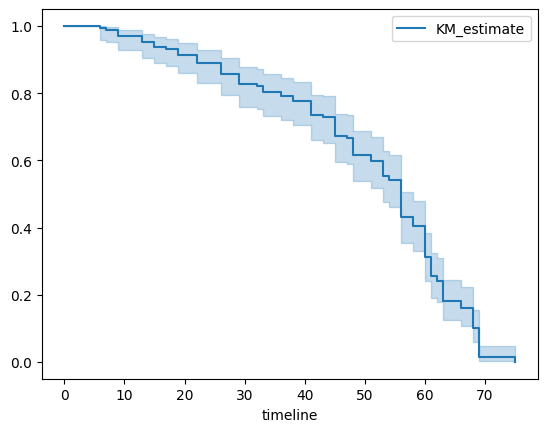

In [15]:
kmf.plot_survival_function()

## Other parametric models

<Axes: >

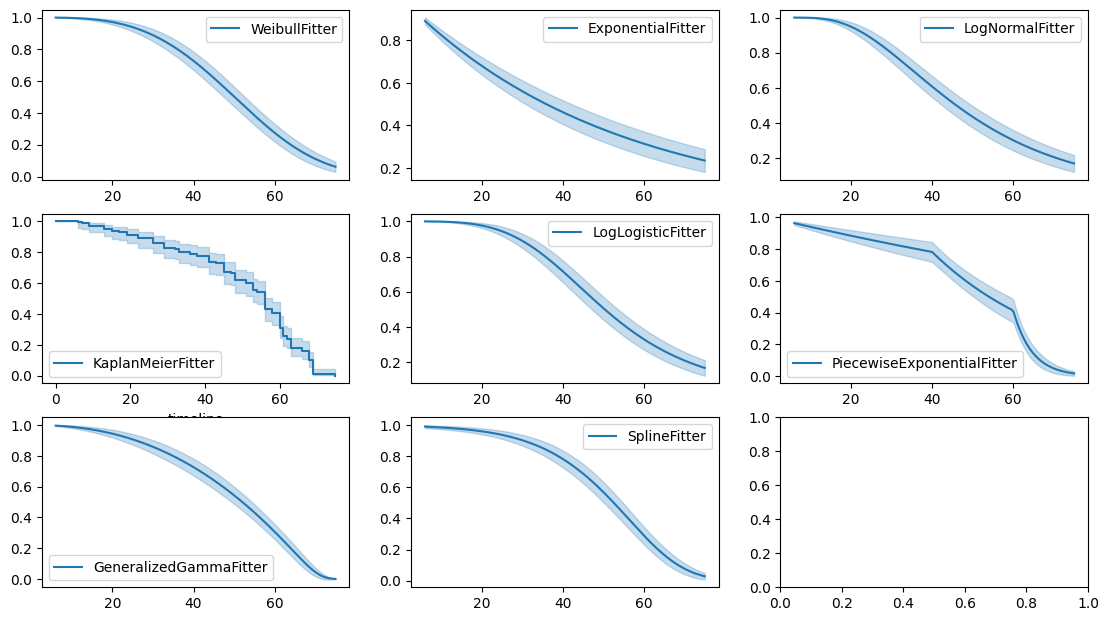

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from lifelines import *

fig, axes = plt.subplots(3, 3, figsize=(13.5, 7.5))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')
sf = SplineFitter(np.percentile(T.loc[E.astype(bool)], [0, 50, 100])).fit(T, E, label='SplineFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
pwf.plot_survival_function(ax=axes[1][2])
ggf.plot_survival_function(ax=axes[2][0])
sf.plot_survival_function(ax=axes[2][1])

## Multiple groups

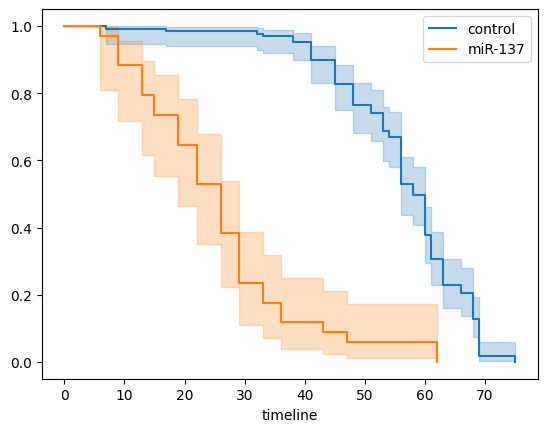

In [17]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot_survival_function()

kmf.fit(T[ix], E[ix], label='miR-137')
ax = kmf.plot_survival_function(ax=ax)

In [18]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 163 total observations, 7 right-censored observations>

<Axes: xlabel='timeline'>

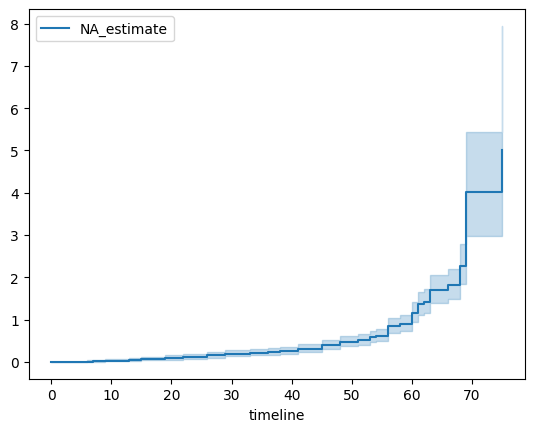

In [20]:
naf.plot_cumulative_hazard()